In [76]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from scipy.stats import linregress
from scipy.stats import t
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
# Начнём с информации об игроках

In [77]:
data_players = pd.read_csv("C:/Users/artsa/Downloads/top5-players.csv")

In [78]:
data_players.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,xG,npxG,xAG,npxG+xAG,PrgC,PrgP,PrgR,Gls_90,Ast_90,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90
0,1,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,23.0,2000.0,20,13,1237,13.7,0,1,1,0,0,0,1,0,0.0,0.0,0.8,0.9,22.0,43.0,26.0,0.00,0.07,0.07,0.00,0.07,0.00,0.06,0.06,0.00,0.06
1,2,Brenden Aaronson,us USA,"MF,FW",Union Berlin,de Bundesliga,22.0,2000.0,30,14,1267,14.1,2,2,4,2,0,0,3,1,2.0,2.0,1.9,3.8,37.0,56.0,91.0,0.14,0.14,0.28,0.14,0.28,0.14,0.13,0.27,0.14,0.27
2,3,Paxten Aaronson,us USA,MF,Eint Frankfurt,de Bundesliga,19.0,2003.0,7,1,101,1.1,0,1,1,0,0,0,0,0,0.1,0.1,0.1,0.2,2.0,5.0,7.0,0.00,0.89,0.89,0.00,0.89,0.11,0.07,0.19,0.11,0.19
3,4,Keyliane Abdallah,fr FRA,FW,Marseille,fr Ligue 1,17.0,2006.0,1,0,4,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,5,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,35.0,1987.0,31,31,2781,30.9,4,0,4,3,1,1,5,0,3.4,2.6,0.3,2.9,36.0,137.0,9.0,0.13,0.00,0.13,0.10,0.10,0.11,0.01,0.12,0.09,0.09


In [ ]:
# Посмотрим, есть ли NaN значения

In [79]:
data_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2852 entries, 0 to 2851
Data columns (total 37 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rk           2852 non-null   int64  
 1   Player       2852 non-null   object 
 2   Nation       2849 non-null   object 
 3   Pos          2852 non-null   object 
 4   Squad        2852 non-null   object 
 5   Comp         2852 non-null   object 
 6   Age          2848 non-null   float64
 7   Born         2848 non-null   float64
 8   MP           2852 non-null   int64  
 9   Starts       2852 non-null   int64  
 10  Min          2852 non-null   int64  
 11  90s          2852 non-null   float64
 12  Gls          2852 non-null   int64  
 13  Ast          2852 non-null   int64  
 14  G+A          2852 non-null   int64  
 15  G-PK         2852 non-null   int64  
 16  PK           2852 non-null   int64  
 17  PKatt        2852 non-null   int64  
 18  CrdY         2852 non-null   int64  
 19  CrdR  

In [ ]:
# Оказывается, что есть, но их немного, мы вполне можем обработать их точечно

In [80]:
print(data_players[((data_players['Nation'].isna()) | (data_players['Age'].isna()) | (data_players['Born'].isna())  | (data_players['xG'].isna()))])

        Rk              Player  Nation    Pos        Squad           Comp  \
1395  1396   Mahmut Kücüksahin     NaN     MF     Augsburg  de Bundesliga   
1638  1639  Tommaso Martinelli  it ITA     GK   Fiorentina     it Serie A   
1784  1785       Max Moerstedt  de GER  DF,FW   Hoffenheim  de Bundesliga   
2074  2075    Marco Pellegrino     NaN     DF  Salernitana     it Serie A   
2075  2076    Marco Pellegrino     NaN     DF        Milan     it Serie A   
2529  2530        Max Svensson  es ESP     FW      Osasuna     es La Liga   

       Age    Born  MP  Starts  Min  90s  Gls  Ast  G+A  G-PK  PK  PKatt  \
1395  19.0  2004.0   1       0    1  0.0    0    0    0     0   0      0   
1638  17.0  2006.0   1       1   90  1.0    0    0    0     0   0      0   
1784   NaN     NaN   1       0   12  0.1    0    0    0     0   0      0   
2074   NaN     NaN  10       5  545  6.1    0    0    0     0   0      0   
2075   NaN     NaN   1       0   68  0.8    0    0    0     0   0      0   
2529

In [ ]:
# По информации из интернета: Mahmut Kücüksahin - турок (tr TUR), Marco Pellegrino - аргентинец (ar ARG), 2002 года рождения (22 года), Max Moerstedt -
# 2006 года рождения (19 лет), Max Svensson - 2001 года рождения (23 года), а вот у Tommaso Martinelli - очень много пропущенных значений и информации о
# нём нет (ему только 19) и сыграл он только 1 матч, поэтому справедливо заменить эти значения на нули

In [81]:
data_players.loc[data_players['Rk'] == 1396, 'Nation'] = 'tr TUR'
data_players.loc[(data_players['Rk'] == 2075) | (data_players['Rk'] == 2076), 'Nation'] = 'ar ARG'
data_players.loc[data_players['Rk'] == 1785, ['Age', 'Born']] = [22, 2002]
data_players.loc[data_players['Rk'] == 2075, ['Age', 'Born']] = [19, 2006]
data_players.loc[data_players['Rk'] == 2076, ['Age', 'Born']] = [19, 2006]
data_players.loc[data_players['Rk'] == 2530, ['Age', 'Born']] = [23, 2001]

In [82]:
data_players.fillna(value=0, inplace=True)

In [ ]:
# Проверим:

In [83]:
data_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2852 entries, 0 to 2851
Data columns (total 37 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rk           2852 non-null   int64  
 1   Player       2852 non-null   object 
 2   Nation       2852 non-null   object 
 3   Pos          2852 non-null   object 
 4   Squad        2852 non-null   object 
 5   Comp         2852 non-null   object 
 6   Age          2852 non-null   float64
 7   Born         2852 non-null   float64
 8   MP           2852 non-null   int64  
 9   Starts       2852 non-null   int64  
 10  Min          2852 non-null   int64  
 11  90s          2852 non-null   float64
 12  Gls          2852 non-null   int64  
 13  Ast          2852 non-null   int64  
 14  G+A          2852 non-null   int64  
 15  G-PK         2852 non-null   int64  
 16  PK           2852 non-null   int64  
 17  PKatt        2852 non-null   int64  
 18  CrdY         2852 non-null   int64  
 19  CrdR  

In [ ]:
# Перейдём ко второму датасету

In [84]:
data_teams = pd.read_csv("C:/Users/artsa/Downloads/Team_result.csv")

In [85]:
data_teams.head()

,id,League,Team,Team_Rus,Plays,Wins,Draws,Falls,Goals,Miss goals,Different,Score,Rank
0,1,eng Premier League,Manchester City,Манчестер Сити,38,28,7,3,96,34,62,91,1
1,2,eng Premier League,Arsenal,Арсенал,38,28,5,5,91,29,62,89,2
2,3,eng Premier League,Liverpool,Ливерпуль,38,24,10,4,86,41,45,82,3
3,4,eng Premier League,Aston Villa,Астон Вилла,38,20,8,10,76,61,15,68,4
4,5,eng Premier League,Tottenham,Тоттенхэм Хотспур,38,20,6,12,74,61,13,66,5


In [ ]:
# Гипотеза 1: чем больше игроков команды выступили лучше ожидаемого, тем выше эта команда в таблице лидеров
# Предлагается сравнить показатели Gls (фактически забитые мячи) и xG (метрика, которая показывает, сколько голов ожидалось от игрока)
# P.S xG учитывает созданные игроками опасные моменты, удары по воротам и тд, это некое мат.ожидание от игрока

In [ ]:
# Чтобы учитывать ещё и ассисты, будем сравнивать сумму Gls+A-PK с npxG+xAG, то есть сумму ожидаемых голов и ассистов без учёта пенальти
# Добавим столбец is_better, который будет принимать значение True, если Gls-PK+A > npxG+xAG и false если нет

In [86]:
data_players['is_better'] = data_players['G+A'] - data_players['PK'] > data_players['npxG+xAG']

In [ ]:
# Добавим в таблицу data_team столбец, в котором будет храниться количество проявивших себя игроков на количество человек в команде
# (получится некая вероятность для игрока сыграть лучше ожиданий)

In [87]:
data_players.rename(columns={'Squad':'Team'}, inplace=True)

In [88]:
best_players_per_team = data_players[data_players['is_better'] == True].groupby('Team').size()
total_players_per_team = data_players[data_players['Pos'] != "GK"].groupby('Team').size()
ratio_best_to_total = best_players_per_team.divide(total_players_per_team).reset_index(name='p_better')
data_teams = data_teams.merge(ratio_best_to_total, how='left', on='Team')

In [89]:
data_teams.head()

,id,League,Team,Team_Rus,Plays,Wins,Draws,Falls,Goals,Miss goals,Different,Score,Rank,p_better
0,1,eng Premier League,Manchester City,Манчестер Сити,38,28,7,3,96,34,62,91,1,0.391304
1,2,eng Premier League,Arsenal,Арсенал,38,28,5,5,91,29,62,89,2,0.434783
2,3,eng Premier League,Liverpool,Ливерпуль,38,24,10,4,86,41,45,82,3,0.250000
3,4,eng Premier League,Aston Villa,Астон Вилла,38,20,8,10,76,61,15,68,4,0.379310
4,5,eng Premier League,Tottenham,Тоттенхэм Хотспур,38,20,6,12,74,61,13,66,5,0.392857


In [ ]:
# Построим график

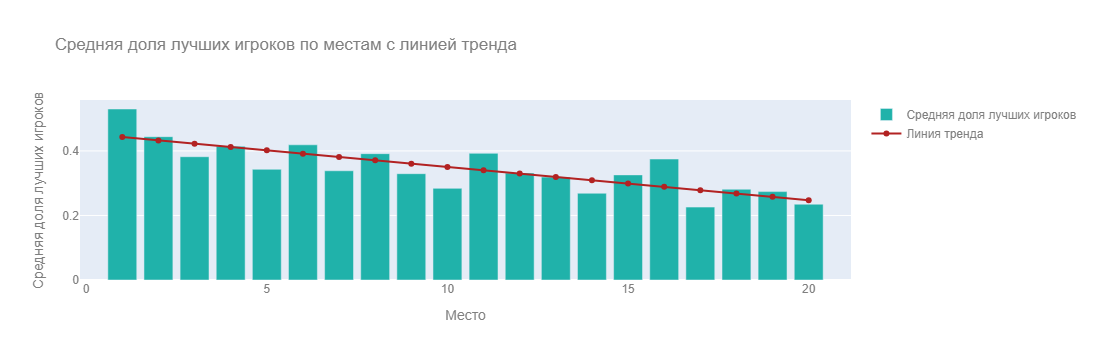

In [90]:
average_per_rank = data_teams.groupby('Rank')['p_better'].mean().reset_index()
slope, intercept, r_value, p_value, std_err = linregress(average_per_rank['Rank'], average_per_rank['p_better'])
line_x = average_per_rank['Rank']
line_y = slope * line_x + intercept
fig = go.Figure()
fig.add_trace(go.Bar(
    x=average_per_rank['Rank'],
    y=average_per_rank['p_better'],
    marker_color='lightseagreen',
    name='Средняя доля лучших игроков'
))
fig.add_trace(go.Scatter(
    x=line_x,
    y=line_y,
    mode='lines+markers',
    line=dict(color='firebrick'),
    name='Линия тренда'
))
fig.update_layout(
    title='Средняя доля лучших игроков по местам с линией тренда',
    xaxis_title='Место',
    yaxis_title='Средняя доля лучших игроков',
    width=700,
    font=dict(family="Arial", size=12, color="#7f7f7f"),
    showlegend=True
)
fig.show()

In [91]:
X = np.array(average_per_rank['p_better'])
Y = np.array(average_per_rank['Rank'])
n = len(X)

X_mean = np.mean(X)
Y_mean = np.mean(Y)

Sxy = np.sum((X - X_mean) * (Y - Y_mean))
Sxx = np.sum((X - X_mean)**2)
Syy = np.sum((Y - Y_mean)**2)

slope = Sxy / Sxx
intercept = Y_mean - slope * X_mean
r = Sxy / np.sqrt(Sxx * Syy)

t_stat = r * np.sqrt((n - 2) / (1 - r**2))
df = n - 2
p_value = 2 * (1 - t.cdf(abs(t_stat), df))

print(f"Средние: X̄={X_mean:.4f}, Ȳ={Y_mean:.4f}")
print(f"Sxy={Sxy:.4f}, Sxx={Sxx:.4f}, Syy={Syy:.4f}")
print(f"slope={slope:.4f}, intercept={intercept:.4f}")
print(f"r={r:.4f}")
print(f"t-stat={t_stat:.4f}, p-value={p_value:.5f}")

if slope < 0 and p_value < 0.05:
    print("✅ Гипотеза подтверждается: чем больше успешных игроков, тем выше команда в таблице.")
else:
    print("❌ Гипотеза не подтверждается.")

Средние: X̄=0.3452, Ȳ=10.5000
Sxy=-6.8421, Sxx=0.1074, Syy=665.0000
slope=-63.6830, intercept=32.4816
r=-0.8095
t-stat=-5.8488, p-value=0.00002
✅ Гипотеза подтверждается: чем больше успешных игроков, тем выше команда в таблице.


In [ ]:
# Вывод: в топовых клубах, игроки зачастую проявляют себя выше ожиданий. Поэтому тренеру стоит обращать внимание на тех игроков, у которых фактическая
# результативность выше расчётной

In [ ]:
# Гипотеза 2: в сильных командах, мячи забивают преимущественно нападающие, а в слабых - как придётся.
# Эта гипотеза помогает понять важность тактики в игре команд: соблюдается ли классическая тактика: защитники (вынос) -> полузащитники (ассист) -> 
# -> нападающие (гол). Как нарушение этой схемы отразится на результатах команды

In [92]:
data_players['Pos'].unique()

array(['DF', 'MF,FW', 'MF', 'FW', 'FW,MF', 'DF,FW', 'GK', 'DF,MF',
       'MF,DF', 'FW,DF'], dtype=object)

In [ ]:
# Избавимся от повторов

In [93]:
def normalize_position(pos):
    parts = sorted([p.strip() for p in pos.split(',')])
    return ', '.join(parts)
data_players['Pos'] = data_players['Pos'].apply(normalize_position)
positions_list = data_players['Pos'].unique()
print(positions_list)

['DF' 'FW, MF' 'MF' 'FW' 'DF, FW' 'GK' 'DF, MF']


In [ ]:
# Здесь DF - защитник, MF - полузащитник, FW - нападающий, остальные - гибриды. Будем считать, что если у игрока в позиции есть часть FW, то его голы не
# будут считаться нарушением тактики. Посчитаем процент мячей, которые забили представители каждой позиции

In [94]:
for pos in positions_list:
    players_at_pos = data_players[data_players['Pos'] == pos]
    goals_by_pos = players_at_pos.groupby('Team')['G-PK'].sum()
    total_goals_by_team = data_players.groupby('Team')['G-PK'].sum()
    percentage_by_team = goals_by_pos.divide(total_goals_by_team, fill_value=0)
    column_name = f'{pos}_Percentage'
    data_teams[column_name] = data_teams['Team'].map(percentage_by_team)

In [95]:
data_teams.head()

,id,League,Team,Team_Rus,Plays,Wins,Draws,Falls,Goals,Miss goals,Different,Score,Rank,p_better,DF_Percentage,"FW, MF_Percentage",MF_Percentage,FW_Percentage,"DF, FW_Percentage",GK_Percentage,"DF, MF_Percentage"
0,1,eng Premier League,Manchester City,Манчестер Сити,38,28,7,3,96,34,62,91,1,0.391304,0.070588,0.482353,0.152941,0.235294,0.0,0.0,0.058824
1,2,eng Premier League,Arsenal,Арсенал,38,28,5,5,91,29,62,89,2,0.434783,0.184211,0.315789,0.171053,0.328947,0.0,0.0,0.000000
2,3,eng Premier League,Liverpool,Ливерпуль,38,24,10,4,86,41,45,82,3,0.250000,0.148649,0.148649,0.135135,0.567568,0.0,0.0,0.000000
3,4,eng Premier League,Aston Villa,Астон Вилла,38,20,8,10,76,61,15,68,4,0.379310,0.117647,0.514706,0.088235,0.279412,0.0,0.0,0.000000
4,5,eng Premier League,Tottenham,Тоттенхэм Хотспур,38,20,6,12,74,61,13,66,5,0.392857,0.223881,0.119403,0.149254,0.507463,0.0,0.0,0.000000


In [ ]:
# Визуализируем наши данные

In [96]:
data_teams.columns

Index(['id', 'League', 'Team', 'Team_Rus', 'Plays', 'Wins', 'Draws', 'Falls',
       'Goals', 'Miss goals', 'Different', 'Score', 'Rank', 'p_better',
       'DF_Percentage', 'FW, MF_Percentage', 'MF_Percentage', 'FW_Percentage',
       'DF, FW_Percentage', 'GK_Percentage', 'DF, MF_Percentage'],
      dtype='object')

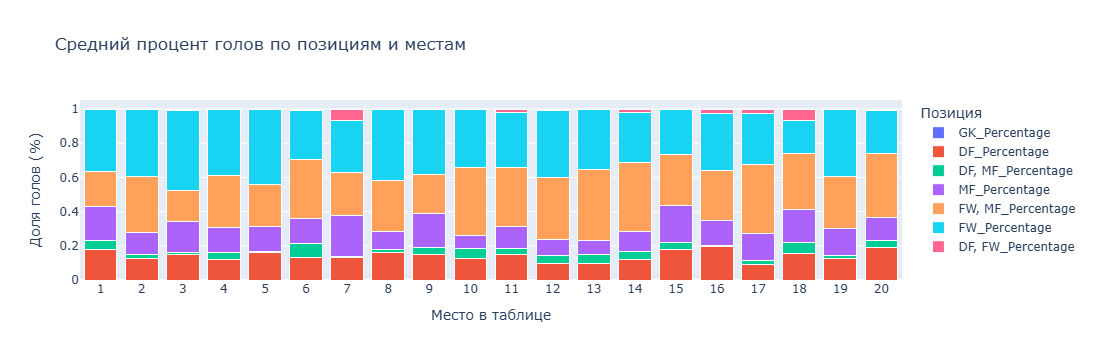

In [99]:
custom_order = ['GK_Percentage', 'DF_Percentage', 'DF, MF_Percentage', 'MF_Percentage', 'FW, MF_Percentage', 'FW_Percentage', 'DF, FW_Percentage']
position_cols = [col for col in custom_order if col in data_teams.columns]
agg_df = data_teams.groupby('Rank')[position_cols].mean().reset_index()
melted_df = pd.melt(
    agg_df, 
    id_vars='Rank', 
    value_vars=position_cols, 
    var_name='Position', 
    value_name='Percentage'
)
melted_df['Position'] = pd.Categorical(
    melted_df['Position'], 
    categories=custom_order, 
    ordered=True
)
melted_df = melted_df.sort_values(['Rank', 'Position'])
melted_df = melted_df.sort_values('Rank')
fig = px.bar(
    melted_df,
    x='Rank',
    y='Percentage',
    color='Position',
    title='Средний процент голов по позициям и местам',
    labels={'Rank': 'Место', 'Percentage': 'Доля голов (%)'},
    category_orders={
        "Position": custom_order,
        "Rank": sorted(melted_df['Rank'].unique())
    },
    barmode='stack'
)
fig.update_xaxes(
    type='category',
    title_text='Место в таблице',
    categoryorder='array',
    categoryarray=sorted(melted_df['Rank'].unique())
)
fig.update_yaxes(title_text='Доля голов (%)')
fig.update_traces(marker_line_width=1, marker_line_color='white')
fig.update_layout(
    legend_title='Позиция',
    legend_traceorder='normal',
    xaxis={'tickmode': 'linear'}
)

fig.show()

In [98]:
agg_df.head()

,Rank,GK_Percentage,DF_Percentage,"DF, MF_Percentage",MF_Percentage,"FW, MF_Percentage",FW_Percentage,"DF, FW_Percentage"
0,1,0.0,0.180577,0.053046,0.197016,0.204436,0.364925,0.000000
1,2,0.0,0.123727,0.026786,0.128886,0.328076,0.389400,0.003125
2,3,0.0,0.146623,0.013173,0.184142,0.181828,0.463474,0.010761
3,4,0.0,0.120973,0.041270,0.146714,0.301417,0.385460,0.004167
4,5,0.0,0.158919,0.006061,0.146867,0.245396,0.442758,0.000000


In [102]:
X = np.array(agg_df['Rank'])
Y = np.array(agg_df['FW_Percentage'])
n = len(X)

X_mean = np.mean(X)
Y_mean = np.mean(Y)

Sxy = np.sum((X - X_mean) * (Y - Y_mean))
Sxx = np.sum((X - X_mean)**2)
Syy = np.sum((Y - Y_mean)**2)

slope = Sxy / Sxx
intercept = Y_mean - slope * X_mean
r = Sxy / np.sqrt(Sxx * Syy)

t_stat = r * np.sqrt((n - 2) / (1 - r**2))
df = n - 2
p_value = 2 * (1 - t.cdf(abs(t_stat), df))

print("Ручные вычисления для FW_Percentage:")
print(f"Средние: X̄={X_mean:.4f}, Ȳ={Y_mean:.4f}")
print(f"Sxy={Sxy:.4f}, Sxx={Sxx:.4f}, Syy={Syy:.4f}")
print(f"slope={slope:.4f}, intercept={intercept:.4f}")
print(f"r={r:.4f}")
print(f"t-stat={t_stat:.4f}, p-value={p_value:.4f}")

if round(slope,1) < 0 and p_value < 0.05:
    print("✅ Гипотеза подтверждается: чем сильнее команда, тем больше голов забивают нападающие.")
else:
    print("❌ Гипотеза не подтверждается: статистически значимой зависимости нет.")

Ручные вычисления для FW_Percentage:
Средние: X̄=10.5000, Ȳ=0.3431
Sxy=-4.5747, Sxx=665.0000, Syy=0.0891
slope=-0.0069, intercept=0.4154
r=-0.5944
t-stat=-3.1362, p-value=0.0057
❌ Гипотеза не подтверждается: статистически значимой зависимости нет.


In [ ]:
# Мы видим, что гипотеза не подтверждается

In [ ]:
# Гипотеза 3: существуют корреляция между забитыми мячами и характеристиками продвижения
# У нас в таблице есть значения PrC, PrP, PrR - количество выносов, пасов и пробежек, которые продвигали команду вперёд. Мы добавим к этим
# характеристикам стандартные G-PK и Ast, чтобы посмотреть, как они коррелируют между собой

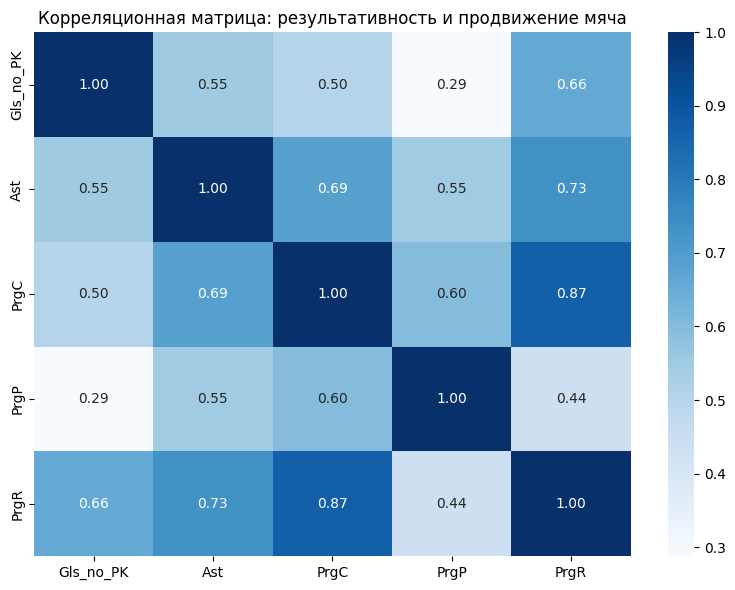

In [104]:
columns = ['Gls', 'PK', 'Ast', 'PrgC', 'PrgP', 'PrgR']
df_corr = data_players[columns].dropna()
df_corr['Gls_no_PK'] = df_corr['Gls'] - df_corr['PK']

# Построение корреляционной матрицы
corr_matrix = df_corr[['Gls_no_PK', 'Ast', 'PrgC', 'PrgP', 'PrgR']].corr()

# График
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="Blues", fmt=".2f")
plt.title("Корреляционная матрица: результативность и продвижение мяча")
plt.tight_layout()
plt.show()

In [106]:
correlation_results = {}
goal_eff = df_corr['Gls_no_PK']
ast = df_corr['Ast']

for var in ['PrgC', 'PrgP', 'PrgR']:
    r_goal, p_goal = pearsonr(goal_eff, df_corr[var])
    r_ast, p_ast = pearsonr(ast, df_corr[var])
    correlation_results[var] = {
        'r_goal': r_goal,
        'p_goal': p_goal,
        'r_ast': r_ast,
        'p_ast': p_ast
    }

correlation_df = pd.DataFrame(correlation_results).T
correlation_df.columns = [
    'Корреляция Gls_no_PK', 'p-value Gls_no_PK',
    'Корреляция Ast', 'p-value Ast'
]

alpha = 0.05
def is_significant(p):
    return "✅ подтверждена" if p < alpha else "❌ не подтверждена"

correlation_df["Гипотеза Gls_no_PK"] = correlation_df["p-value Gls_no_PK"].apply(is_significant)
correlation_df["Гипотеза Ast"] = correlation_df["p-value Ast"].apply(is_significant)

correlation_df

,Корреляция Gls_no_PK,p-value Gls_no_PK,Корреляция Ast,p-value Ast,Гипотеза Gls_no_PK,Гипотеза Ast
PrgC,0.504227,8.336436e-184,0.691139,0.000000e+00,✅ подтверждена,✅ подтверждена
PrgP,0.287740,1.694402e-55,0.547678,5.537069e-223,✅ подтверждена,✅ подтверждена
PrgR,0.657851,0.000000e+00,0.730579,0.000000e+00,✅ подтверждена,✅ подтверждена


In [ ]:
# Можем отметить, что проходы вперёд и выносы хорошо коррелируют между собой. Обратим внимание на корреляцию голов, ассистов и параметров продвижения:
# Видим, что корреляция параметров продвижения с ассистами сильнее, чем с голами. Это может навести на следующую гипотезу

In [ ]:
# Гипотеза 4: Сумма параметров продвижения можно рассматривать, как основной параметр сравнения защитников
# Почему именно защитники? Задача нападающих - забивать голы, задача вратаря - защищать ворота. А вот защитники - должны заниматься именно выносамм
# пасами и пробежками, чтобы доставить мяч до нападающих. Поэтому для них было бы неплохо придумать характеристику сравнения

In [ ]:
# Сначала введём параметр Sum Progress Activity On Match (SPAOM) = (PrgC + PrP + PrgR) * 90 / Min

In [107]:
data_players['SPAOM'] = np.where(
    data_players['Min'] >= 60, (data_players['PrgC'] + data_players['PrgP'] + data_players['PrgR']) * 90 / data_players['Min'],0)
data_players.head()

,Rk,Player,Nation,Pos,Team,Comp,Age,Born,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,xG,npxG,xAG,npxG+xAG,PrgC,PrgP,PrgR,Gls_90,Ast_90,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90,is_better,SPAOM
0,1,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,23.0,2000.0,20,13,1237,13.7,0,1,1,0,0,0,1,0,0.0,0.0,0.8,0.9,22.0,43.0,26.0,0.00,0.07,0.07,0.00,0.07,0.00,0.06,0.06,0.00,0.06,True,6.620857
1,2,Brenden Aaronson,us USA,"FW, MF",Union Berlin,de Bundesliga,22.0,2000.0,30,14,1267,14.1,2,2,4,2,0,0,3,1,2.0,2.0,1.9,3.8,37.0,56.0,91.0,0.14,0.14,0.28,0.14,0.28,0.14,0.13,0.27,0.14,0.27,True,13.070245
2,3,Paxten Aaronson,us USA,MF,Eint Frankfurt,de Bundesliga,19.0,2003.0,7,1,101,1.1,0,1,1,0,0,0,0,0,0.1,0.1,0.1,0.2,2.0,5.0,7.0,0.00,0.89,0.89,0.00,0.89,0.11,0.07,0.19,0.11,0.19,True,12.475248
3,4,Keyliane Abdallah,fr FRA,FW,Marseille,fr Ligue 1,17.0,2006.0,1,0,4,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,False,0.000000
4,5,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,35.0,1987.0,31,31,2781,30.9,4,0,4,3,1,1,5,0,3.4,2.6,0.3,2.9,36.0,137.0,9.0,0.13,0.00,0.13,0.10,0.10,0.11,0.01,0.12,0.09,0.09,True,5.889968


In [108]:
data_players.sort_values(['SPAOM']).tail()

,Rk,Player,Nation,Pos,Team,Comp,Age,Born,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,xG,npxG,xAG,npxG+xAG,PrgC,PrgP,PrgR,Gls_90,Ast_90,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90,is_better,SPAOM
741,742,Jeremy Doku,be BEL,"FW, MF",Manchester City,eng Premier League,21.0,2002.0,29,18,1595,17.7,3,8,11,3,0,0,3,0,2.5,2.5,4.6,7.1,218.0,57.0,295.0,0.17,0.45,0.62,0.17,0.62,0.14,0.26,0.40,0.14,0.40,True,32.163009
670,671,Ousmane Dembélé,fr FRA,"FW, MF",Paris S-G,fr Ligue 1,26.0,1997.0,26,17,1506,16.7,3,8,11,3,0,0,0,0,4.4,4.4,6.7,11.1,160.0,133.0,247.0,0.18,0.48,0.66,0.18,0.66,0.26,0.40,0.67,0.26,0.67,False,32.270916
2473,2474,Manor Solomon,il ISR,FW,Tottenham,eng Premier League,24.0,1999.0,5,2,199,2.2,0,2,2,0,0,0,1,0,0.4,0.4,0.8,1.2,17.0,11.0,44.0,0.00,0.90,0.90,0.00,0.90,0.19,0.38,0.56,0.19,0.56,True,32.562814
975,976,Bryan Gil,es ESP,"FW, MF",Tottenham,eng Premier League,22.0,2001.0,11,2,209,2.3,0,0,0,0,0,0,0,0,0.8,0.8,0.2,1.0,11.0,16.0,49.0,0.00,0.00,0.00,0.00,0.00,0.32,0.09,0.41,0.32,0.41,False,32.727273
2101,2102,Ivan Perišić,hr CRO,FW,Tottenham,eng Premier League,34.0,1989.0,5,0,103,1.1,0,1,1,0,0,0,2,0,0.1,0.1,0.9,1.0,15.0,9.0,17.0,0.00,0.87,0.87,0.00,0.87,0.10,0.75,0.85,0.10,0.85,False,35.825243


In [109]:
for pos in positions_list:
    players_at_pos = data_players[data_players['Pos'] == pos]
    team_spaom = players_at_pos.groupby('Team')['SPAOM'].mean()
    column_name = f'{pos}_SPAOM'
    data_teams[column_name] = data_teams['Team'].map(team_spaom)
data_teams.fillna(value=0, inplace=True)
data_teams.head()

,id,League,Team,Team_Rus,Plays,Wins,Draws,Falls,Goals,Miss goals,Different,Score,Rank,p_better,DF_Percentage,"FW, MF_Percentage",MF_Percentage,FW_Percentage,"DF, FW_Percentage",GK_Percentage,"DF, MF_Percentage",DF_SPAOM,"FW, MF_SPAOM",MF_SPAOM,FW_SPAOM,"DF, FW_SPAOM",GK_SPAOM,"DF, MF_SPAOM"
0,1,eng Premier League,Manchester City,Манчестер Сити,38,28,7,3,96,34,62,91,1,0.391304,0.070588,0.482353,0.152941,0.235294,0.0,0.0,0.058824,8.010781,18.384636,11.423276,6.594828,0.0,0.064632,9.191153
1,2,eng Premier League,Arsenal,Арсенал,38,28,5,5,91,29,62,89,2,0.434783,0.184211,0.315789,0.171053,0.328947,0.0,0.0,0.000000,10.552172,15.090235,10.975124,14.317578,0.0,0.197917,11.078680
2,3,eng Premier League,Liverpool,Ливерпуль,38,24,10,4,86,41,45,82,3,0.250000,0.148649,0.148649,0.135135,0.567568,0.0,0.0,0.000000,10.314946,16.771555,8.555603,9.904746,0.0,0.139286,0.000000
3,4,eng Premier League,Aston Villa,Астон Вилла,38,20,8,10,76,61,15,68,4,0.379310,0.117647,0.514706,0.088235,0.279412,0.0,0.0,0.000000,7.086011,11.082597,3.406306,3.086727,0.0,0.029851,1.776316
4,5,eng Premier League,Tottenham,Тоттенхэм Хотспур,38,20,6,12,74,61,13,66,5,0.392857,0.223881,0.119403,0.149254,0.507463,0.0,0.0,0.000000,6.925770,27.491442,12.182766,15.957792,0.0,0.078947,8.910891


In [110]:
data_teams.columns

Index(['id', 'League', 'Team', 'Team_Rus', 'Plays', 'Wins', 'Draws', 'Falls',
       'Goals', 'Miss goals', 'Different', 'Score', 'Rank', 'p_better',
       'DF_Percentage', 'FW, MF_Percentage', 'MF_Percentage', 'FW_Percentage',
       'DF, FW_Percentage', 'GK_Percentage', 'DF, MF_Percentage', 'DF_SPAOM',
       'FW, MF_SPAOM', 'MF_SPAOM', 'FW_SPAOM', 'DF, FW_SPAOM', 'GK_SPAOM',
       'DF, MF_SPAOM'],
      dtype='object')

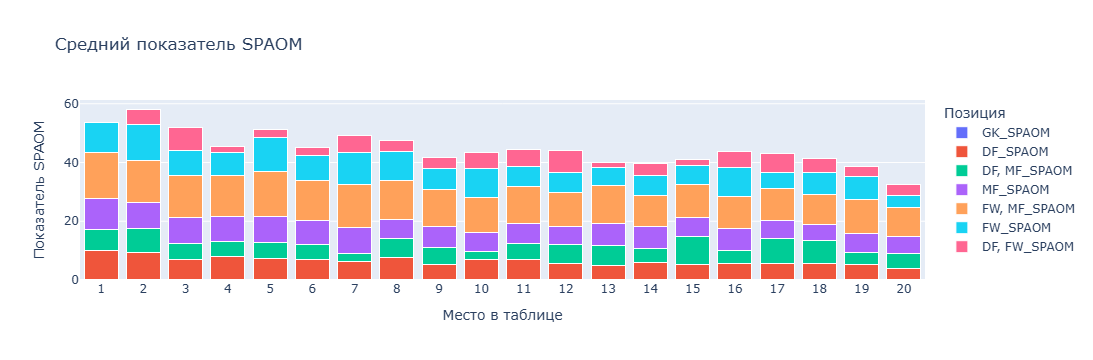

In [111]:
custom_order = ['GK_SPAOM', 'DF_SPAOM', 'DF, MF_SPAOM', 'MF_SPAOM', 'FW, MF_SPAOM', 'FW_SPAOM', 'DF, FW_SPAOM']
position_cols = [col for col in custom_order if col in data_teams.columns]
agg_df_SPAOM = data_teams.groupby('Rank')[position_cols].mean().reset_index()
melted_df = pd.melt(
    agg_df_SPAOM, 
    id_vars='Rank', 
    value_vars=position_cols, 
    var_name='Position', 
    value_name='Percentage'
)
melted_df['Position'] = pd.Categorical(
    melted_df['Position'], 
    categories=custom_order, 
    ordered=True
)
melted_df = melted_df.sort_values(['Rank', 'Position'])
melted_df = melted_df.sort_values('Rank')
fig = px.bar(
    melted_df,
    x='Rank',
    y='Percentage',
    color='Position',
    title='Средний показатель SPAOM',
    labels={'Rank': 'Место', 'Percentage': 'Доля голов (%)'},
    category_orders={
        "Position": custom_order,
        "Rank": sorted(melted_df['Rank'].unique())
    },
    barmode='stack'
)
fig.update_xaxes(
    type='category',
    title_text='Место в таблице',
    categoryorder='array',
    categoryarray=sorted(melted_df['Rank'].unique())
)
fig.update_yaxes(title_text='Показатель SPAOM')
fig.update_traces(marker_line_width=1, marker_line_color='white')
fig.update_layout(
    legend_title='Позиция',
    legend_traceorder='normal',
    xaxis={'tickmode': 'linear'}
)

fig.show()

In [ ]:
# (послание) Сделай вывод с помощью статистических методов. График интерактивный, поэтому ты можешь включать и отключать категории. Категории GK_SPAOM 
# и DF,FW_SPAOM не рассматривай. Во всех остальных категориях нисходящая тенденция прослеживается, определи где угол наклона больше - там параметр
# наиболее важный. (судя по всему это DF всё-таки)

In [112]:
agg_df.head()

,Rank,GK_Percentage,DF_Percentage,"DF, MF_Percentage",MF_Percentage,"FW, MF_Percentage",FW_Percentage,"DF, FW_Percentage"
0,1,0.0,0.180577,0.053046,0.197016,0.204436,0.364925,0.000000
1,2,0.0,0.123727,0.026786,0.128886,0.328076,0.389400,0.003125
2,3,0.0,0.146623,0.013173,0.184142,0.181828,0.463474,0.010761
3,4,0.0,0.120973,0.041270,0.146714,0.301417,0.385460,0.004167
4,5,0.0,0.158919,0.006061,0.146867,0.245396,0.442758,0.000000


In [113]:
positions = ['FW_SPAOM', 'MF_SPAOM', 'DF_SPAOM']
results = {}

X = np.array(agg_df_SPAOM['Rank'])
n = len(X)
X_mean = np.mean(X)
Sxx = np.sum((X - X_mean)**2)

for pos in positions:
    Y = np.array(agg_df_SPAOM[pos])
    Y_mean = np.mean(Y)
    Syy = np.sum((Y - Y_mean)**2)
    Sxy = np.sum((X - X_mean) * (Y - Y_mean))
    
    slope = Sxy / Sxx
    intercept = Y_mean - slope * X_mean
    r = Sxy / np.sqrt(Sxx * Syy)
    
    t_stat = r * np.sqrt((n - 2) / (1 - r**2))
    df = n - 2
    p_value = 2 * (1 - t.cdf(abs(t_stat), df))
    
    results[pos] = {
        'slope': slope,
        'intercept': intercept,
        'r': r,
        'p_value': p_value
    }

    print(f"\nРучные вычисления для {pos}:")
    print(f"Средние: X̄={X_mean:.4f}, Ȳ={Y_mean:.4f}")
    print(f"Sxy={Sxy:.4f}, Sxx={Sxx:.4f}, Syy={Syy:.4f}")
    print(f"slope={slope:.4f}, intercept={intercept:.4f}")
    print(f"r={r:.4f}")
    print(f"t-stat={t_stat:.4f}, p-value={p_value:.4f}")
    
    if round(slope,1) < 0 and p_value < 0.05:
        print(f"✅ Гипотеза подтверждается для {pos}: чем сильнее команда, тем больше коэффициент SPAOM.")
    else:
        print(f"❌ Гипотеза не подтверждается для {pos}: статистически значимой зависимости нет.")

strongest_pos = max(results, key=lambda x: abs(results[x]['r']))
print(f"\n Наибольшая сила связи (по |r|) наблюдается у: {strongest_pos} с r={results[strongest_pos]['r']:.4f}")


Ручные вычисления для FW_SPAOM:
Средние: X̄=10.5000, Ȳ=8.2512
Sxy=-161.9068, Sxx=665.0000, Syy=85.8243
slope=-0.2435, intercept=10.8077
r=-0.6777
t-stat=-3.9103, p-value=0.0010
✅ Гипотеза подтверждается для FW_SPAOM: чем сильнее команда, тем больше коэффициент SPAOM.

Ручные вычисления для MF_SPAOM:
Средние: X̄=10.5000, Ȳ=7.4150
Sxy=-121.0158, Sxx=665.0000, Syy=32.3260
slope=-0.1820, intercept=9.3258
r=-0.8254
t-stat=-6.2026, p-value=0.0000
✅ Гипотеза подтверждается для MF_SPAOM: чем сильнее команда, тем больше коэффициент SPAOM.

Ручные вычисления для DF_SPAOM:
Средние: X̄=10.5000, Ȳ=6.4743
Sxy=-144.5650, Sxx=665.0000, Syy=42.8472
slope=-0.2174, intercept=8.7569
r=-0.8564
t-stat=-7.0381, p-value=0.0000
✅ Гипотеза подтверждается для DF_SPAOM: чем сильнее команда, тем больше коэффициент SPAOM.

📌 Наибольшая сила связи (по |r|) наблюдается у: DF_SPAOM с r=-0.8564


In [ ]:
# Вывод: на параметр SPAOM нужно опираться при выборе [позиция]